In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_path():
    source = "names"
    homework_source = os.path.abspath(source)

    return homework_source

In [4]:
def get_names(year_start, year_end, step=""):
    names_by_year = {}
    if step:
        for year in range(int(year_start), int(year_end), int(step)):
            names_by_year[year] = pd.read_csv(os.path.join(get_path(), "", 'yob' + str(year) + '.txt'), 
                                        names=['Name', 'Geder', 'Count'])
    else:
        for year in range(int(year_start), int(year_end)):
            names_by_year[year] = pd.read_csv(os.path.join(get_path(), "", 'yob' + str(year) + '.txt'), 
                                        names=['Name', 'Geder', 'Count'])
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    return names_all

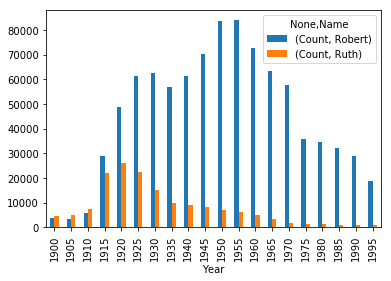

In [12]:
name_dynamics = get_names(1900, 2000, 5)
name_dynamics = name_dynamics.query('Name == ["Ruth", "Robert"]')
name_dynamics = name_dynamics.groupby(['Name', name_dynamics.index.get_level_values(0)]).sum()
name_dynamics.unstack('Name').plot.bar()

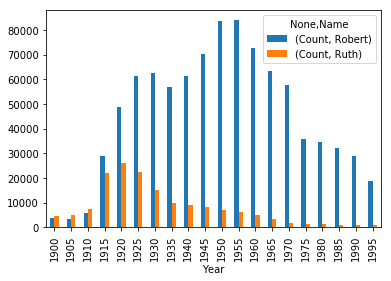

In [11]:
parameters = get_names(1900, 2000, 5)  # получаем график по именам с шагом в 5 лет (2-е задание)
name_dynamics =  parameters.groupby([parameters.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

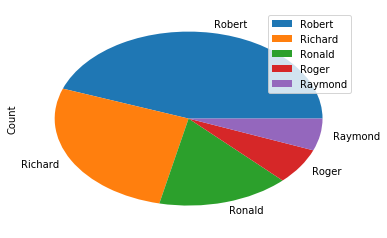

In [4]:
parameters = pd.read_csv(os.path.join(get_path(), "", 'yob' + str(1950) + '.txt'), 
                                        names=['Name', 'Geder', 'Count'])  # ТОП-10 популярных имен, начинающихся на R, за 1950 год. (3-е задание)
parameters[parameters.Name.str.startswith('R')].groupby('Name').sum().sort_values(by='Count', ascending=False).head(5).plot.pie(y='Count')

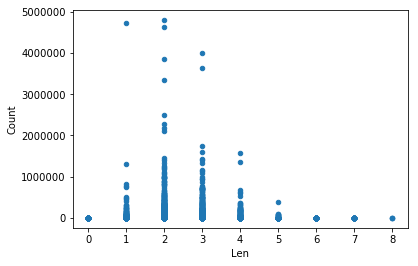

In [11]:
names = get_names(1900, 2000) 
names = names.groupby('Name').sum().reset_index()
names['Len'] = names.apply(lambda row: sum(1 for x in row.Name if x in 'AEIOUYaeiouy'), axis=1)
names.plot.scatter(x='Len', y='Count')